# Titanic Dataset Investigation

<p>Welcome to my investigation of this Titanic Dataset. In this notebook I will explain some information about this dataset, ask some questions, and explore this dataset for those answers. I hope you’re able to enjoy as well as get some information out of this exploration. Let’s get started!</p>

## Examining Dataset, Adjusting Datatypes, and Missing Values

First I will want to retrieve the data from the csv file. This can be done using Pandas `read_csv()` function. This function will read the data from the csv file and write it onto a Pandas dataframe. To test if this was successful, I will make use of the `.head()` function to display a preview of the dataframe.

In [1]:
import pandas as pd
titanic_data = pd.read_csv('titanic-data.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<p>As you can see this titanic dataset consists of 12 columns and over 800 rows. According to Kaggle, some of these columns are the following:<p>

<dl>
  <dt>Survived</dt>
  <dd>0 = No, 1 = Yes</dd>

  <dt>Pclass</dt>
  <dd>Ticket class, 1 = first class, 2 = second class, and 3 = third class</dd>

  <dt>Age</dt>
  <dd>Age in years</dd>

  <dt>Sibsp</dt>
  <dd># of siblings/spouses aboard the Titanic</dd>

  <dt>Parch</dt>
  <dd># of parents/children aboard the Titanic</dd>

  <dt>Ticket</dt>
  <dd>Ticket ID for passenger</dd>

  <dt>Fare<dt>
  <dd>The amount of money spent for ticket(s)</dd>

  <dt>Cabin<dt>
  <dd>The cabin number assigned to passenger</dd>

  <dt>Embarked</dt>
  <dd>The Port at which passengers embarked at. C = Cherbourg, Q = Queentown, S = Southampton</dd>
 
</dl>

From the preview I can see already that there are some missing values in the Cabin column category. I want to see if there are anymore so I will be making use of the `info()` function to locate and empty/null values

In [2]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The values I noticed that not only the *Cabin* column contained missing values, but the *Age* and *Embarked* as well. I want to understand why the cabin values are empty and replace the missing age values, with the mean for the age. While I'm working on this I can also apply some conversions to some values already for my convenience. 

In [4]:
def float_conversion(s): # This will convert columns like fare
    return float(s)

In [5]:
def survived_conversion(s): # This is to convert 0 to 'Died' and 1 to 'Survived'
    if s == 0:
        return 'Died'
    else:
        return 'Survived'

In [6]:
fare_and_cabin_data = titanic_data[['Fare','Cabin']] #This will help to preview the Fare and Cabin Colums

In [7]:
fare_and_cabin_data.head()

,Fare,Cabin
0,7.2500,NaN
1,71.2833,C85
2,7.9250,NaN
3,53.1000,C123
4,8.0500,NaN


In [8]:
print(fare_and_cabin_data)

         Fare        Cabin
0      7.2500          NaN
1     71.2833          C85
2      7.9250          NaN
3     53.1000         C123
4      8.0500          NaN
5      8.4583          NaN
6     51.8625          E46
7     21.0750          NaN
8     11.1333          NaN
9     30.0708          NaN
10    16.7000           G6
11    26.5500         C103
12     8.0500          NaN
13    31.2750          NaN
14     7.8542          NaN
15    16.0000          NaN
16    29.1250          NaN
17    13.0000          NaN
18    18.0000          NaN
19     7.2250          NaN
20    26.0000          NaN
21    13.0000          D56
22     8.0292          NaN
23    35.5000           A6
24    21.0750          NaN
25    31.3875          NaN
26     7.2250          NaN
27   263.0000  C23 C25 C27
28     7.8792          NaN
29     7.8958          NaN
..        ...          ...
861   11.5000          NaN
862   25.9292          D17
863   69.5500          NaN
864   13.0000          NaN
865   13.0000          NaN
8

When looking at the fare and cabin columns I'm unable to find a connection as to the missing cabin values. At first I figured it would have to do with ticket price. This was from seeing the passenger in row 27 paying $263.00 and having 3 cabins. From this one could say that passengers that pay more would have a cabin or cabins. However after noticing row 872, I can see that person payed 5 dollars for their ticket and stayed in not one cabin but three. Using `iloc`, I will be able to get the full information on these passenger.

In [9]:
titanic_data.iloc[872]

PassengerId                         873
Survived                              0
Pclass                                1
Name           Carlsson, Mr. Frans Olof
Sex                                male
Age                                  33
SibSp                                 0
Parch                                 0
Ticket                              695
Fare                                  5
Cabin                       B51 B53 B55
Embarked                              S
Name: 872, dtype: object

From the code above you can see that this passenger was able to get a first class ticket while paying only 5 dollars. Another thing that can be seen is that he had no parents/child or siblings/spouse on board with him. I will now show the passenger in row 27 so I can make comparisons.

In [10]:
titanic_data.iloc[27]

PassengerId                                28
Survived                                    0
Pclass                                      1
Name           Fortune, Mr. Charles Alexander
Sex                                      male
Age                                        19
SibSp                                       3
Parch                                       2
Ticket                                  19950
Fare                                      263
Cabin                             C23 C25 C27
Embarked                                    S
Name: 27, dtype: object

This code shows that the passenger in row 27 had 3 people that can be considered either sibling or spouse, 2 parents or children. What both passengers have in common is that their class is considered first class and they embarked from Southampton. This means that maybe class and/or where you embarked is the deciding factor for who can get a cabin and who cannot. I will use the code below to verify if this is true.

In [11]:
class_and_cabin_data = titanic_data[['Pclass','Cabin']]

In [12]:
print(class_and_cabin_data)

     Pclass        Cabin
0         3          NaN
1         1          C85
2         3          NaN
3         1         C123
4         3          NaN
5         3          NaN
6         1          E46
7         3          NaN
8         3          NaN
9         2          NaN
10        3           G6
11        1         C103
12        3          NaN
13        3          NaN
14        3          NaN
15        2          NaN
16        3          NaN
17        2          NaN
18        3          NaN
19        3          NaN
20        2          NaN
21        2          D56
22        3          NaN
23        1           A6
24        3          NaN
25        3          NaN
26        3          NaN
27        1  C23 C25 C27
28        3          NaN
29        3          NaN
..      ...          ...
861       2          NaN
862       1          D17
863       3          NaN
864       2          NaN
865       2          NaN
866       2          NaN
867       1          A24
868       3          NaN


It can be seen from the code above that all classes have at least 1 person with a cabin. The final comparison I want to make is with where passengers embarked and if they have a cabin.

In [13]:
embarked_and_cabin_data = titanic_data[['Embarked','Cabin']]
print(embarked_and_cabin_data)

    Embarked        Cabin
0          S          NaN
1          C          C85
2          S          NaN
3          S         C123
4          S          NaN
5          Q          NaN
6          S          E46
7          S          NaN
8          S          NaN
9          C          NaN
10         S           G6
11         S         C103
12         S          NaN
13         S          NaN
14         S          NaN
15         S          NaN
16         Q          NaN
17         S          NaN
18         S          NaN
19         C          NaN
20         S          NaN
21         S          D56
22         Q          NaN
23         S           A6
24         S          NaN
25         S          NaN
26         C          NaN
27         S  C23 C25 C27
28         Q          NaN
29         S          NaN
..       ...          ...
861        S          NaN
862        S          D17
863        S          NaN
864        S          NaN
865        S          NaN
866        C          NaN
867        S

The ports that embarked have at least one cabin except Queentown. I'm going to display only the passengers that embarked from Queentown and the cabin data to verify.


In [14]:
embarked_and_cabin_data[embarked_and_cabin_data['Embarked']=='Q']

,Embarked,Cabin
5,Q,NaN
16,Q,NaN
22,Q,NaN
28,Q,NaN
32,Q,NaN
44,Q,NaN
46,Q,NaN
47,Q,NaN
82,Q,NaN
109,Q,NaN


From the code above you can see two passengers with a cabin. I'm not able to find a correlation regarding passenger information and if they had a cabin. I can only infer that cabins were scarce which would explain why a majority of passengers did not stay in one. Now I will apply a change to age using `to_numeric`. This is to make sure its a float type.

In [15]:
titanic_data['Age'] = titanic_data['Age'].apply(pd.to_numeric)
print(titanic_data['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


Now that I'm sure the `Age` coulumn is indeed a float type, I will replace the missing values with the mean of the age column using `fillna()` function.

In [16]:
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean())
print(titanic_data['Age'])

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

The age column now has its missing roles filled in with the mean of age column. Since I was unable to find a reasib the cabin values, I will replace the unknown or missing values with 'None'.

In [17]:
titanic_data['Cabin'] = titanic_data['Cabin'].fillna('None')
print(titanic_data['Cabin'])

0             None
1              C85
2             None
3             C123
4             None
5             None
6              E46
7             None
8             None
9             None
10              G6
11            C103
12            None
13            None
14            None
15            None
16            None
17            None
18            None
19            None
20            None
21             D56
22            None
23              A6
24            None
25            None
26            None
27     C23 C25 C27
28            None
29            None
          ...     
861           None
862            D17
863           None
864           None
865           None
866           None
867            A24
868           None
869           None
870           None
871            D35
872    B51 B53 B55
873           None
874           None
875           None
876           None
877           None
878           None
879            C50
880           None
881           None
882         

 The final thing I want to do is convert the `Fare` column to float type and apply the `survived_conversion` to the `Survived` column of the titanic_data series. 

In [18]:
titanic_data['Fare'] = titanic_data['Fare'].apply(float_conversion)

In [19]:
titanic_data['Survived'] = titanic_data['Survived'].apply(survived_conversion)
print(titanic_data['Survived'])

0          Died
1      Survived
2      Survived
3      Survived
4          Died
5          Died
6          Died
7          Died
8      Survived
9      Survived
10     Survived
11     Survived
12         Died
13         Died
14         Died
15     Survived
16         Died
17     Survived
18         Died
19     Survived
20         Died
21     Survived
22     Survived
23     Survived
24         Died
25     Survived
26         Died
27         Died
28     Survived
29         Died
         ...   
861        Died
862    Survived
863        Died
864        Died
865    Survived
866    Survived
867        Died
868        Died
869    Survived
870        Died
871    Survived
872        Died
873        Died
874    Survived
875    Survived
876        Died
877        Died
878        Died
879    Survived
880    Survived
881        Died
882        Died
883        Died
884        Died
885        Died
886        Died
887    Survived
888        Died
889    Survived
890        Died
Name: Survived, Length: 

I was not able to figure out why most cabin were missing. From what I see what the data it appears than cabins were scarce and couldn't hold everyone. This however is just my opinion and not certain, unfortunately this limits my analysis as if I do attempt to analyze the information on the missing cabins, it could be misleading or a false correlation. With the age values filled and an understanding that some of the values are empty. I'm ready to ask questions. My first question is which gender had a better chance of survival? 

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

## Question 1: Which gender had a better chance of survival?

In order to answer this question I will need to know how many male/female passengers are within this dataset. Then look for any differences between the number of male to the number of female passengers. I will start by using pandas `value_counts()` function on the `Sex` column of the titanic_data series I have. This will give me the number of male and female passengers seperately.

In [21]:
gender_count = titanic_data['Sex'].value_counts()

In [22]:
print(gender_count)

male      577
female    314
Name: Sex, dtype: int64


Now I know there is 577 male passengers within this series and 314 female passengers. I wish to know the percentage difference between male and female passengers. To do this I will create a function called `percentage_difference`. This function will take two numbers and calculate the percentage difference of them.

In [23]:
def percentage_difference(n1,n2):
    difference = n1 - n2
    average = (n1+n2)/2
    return (difference/average)*100

In [24]:
print(percentage_difference(gender_count['male'],gender_count['female']))

59.0347923681


The code above shows that there is approximately 59% more male passengers than female. Now what I want to do is seperate the data by male and female. Then I want to get the data on who survived and who died.

In [25]:
male_data = titanic_data[titanic_data['Sex'] == 'male']
female_data = titanic_data[titanic_data['Sex'] == 'female']

In [26]:
male_survival_data = male_data['Survived'].value_counts()

In [27]:
print(male_survival_data)

Died        468
Survived    109
Name: Survived, dtype: int64


In [28]:
print(male_survival_data['Survived']/(male_survival_data['Died']+male_survival_data['Survived']) * 100)

18.8908145581


From the code above you can see that 468 of the male passengers died and 109 of them survived which is approximately 18.9% of the passengers. Now I will do the same for female passengers

In [29]:
female_survival_data = female_data['Survived'].value_counts()

In [30]:
print(female_survival_data)

Survived    233
Died         81
Name: Survived, dtype: int64


In [31]:
print(female_survival_data['Survived']/(female_survival_data['Died']+female_survival_data['Survived']) * 100)

74.2038216561


The numbers above show that 233 female passengers survived and 81 died. That means 74% survived out of the ones within this dataset.

In [32]:
print(percentage_difference(female_survival_data['Survived'],male_survival_data['Survived'])) # Percentage difference of survivors

72.514619883


From the code above you can see that although there were 59% more male passengers, approximately 72.5% more female passengers survived than males. Gender was not the only factor on who survived and who didn't. Age also had an effect. That brings up the next question, which age group had the better chance of survival?

## Which Age Group Had the Better chance of survival

Before approaching this question I want to get some more information on the age like the youngest passenger and the age of the oldest passenger. This will be done using the `describe()` function. It will show not only the min and max age but the mean and quartiles.

In [33]:
titanic_data['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

The code above shows the youngest passenger being a baby and the oldest passenger being 80 years old.

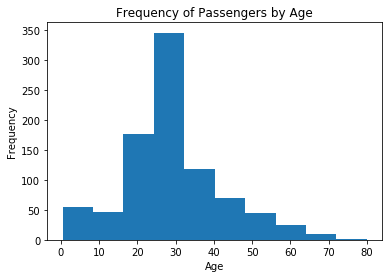

In [34]:
titanic_data['Age'].plot(kind="hist")
plt.title('Frequency of Passengers by Age')
plt.xlabel('Age')

This graph shows that majority of passengers were between 25-30 years old. This is not a coincidence, as previously seen, the `Age` value had 177 missing values. These values are all equivalent to the mean of the Age column which estimates to 29. Now I'll seperate the ages into different groups. One for babies, one for pre-teens, one for teenagers, and finally one for adults. Then I will make comparsion based off the results

In [35]:
baby_data = titanic_data[titanic_data['Age']<1.1]

In [36]:
baby_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,Survived,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,None,S
164,165,Died,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,None,S
172,173,Survived,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,None,S
183,184,Survived,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
305,306,Survived,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S


In [37]:
print(baby_data)

     PassengerId  Survived  Pclass                             Name     Sex  \
78            79  Survived       2    Caldwell, Master. Alden Gates    male   
164          165      Died       3     Panula, Master. Eino Viljami    male   
172          173  Survived       3     Johnson, Miss. Eleanor Ileen  female   
183          184  Survived       2        Becker, Master. Richard F    male   
305          306  Survived       1   Allison, Master. Hudson Trevor    male   
381          382  Survived       3      Nakid, Miss. Maria ("Mary")  female   
386          387      Died       3  Goodwin, Master. Sidney Leonard    male   
469          470  Survived       3    Baclini, Miss. Helene Barbara  female   
644          645  Survived       3           Baclini, Miss. Eugenie  female   
755          756  Survived       2        Hamalainen, Master. Viljo    male   
788          789  Survived       3       Dean, Master. Bertram Vere    male   
803          804  Survived       3  Thomas, Master. 

I started with making a new dataset based on titanic_data. This one was based on babies or people with ages betwee 0-1. It worked successfully and there are 14 baby passengers within this dataset. Now I will proceed to do the rest for the other age groups.

In [38]:
pre_teen_data = titanic_data[(titanic_data['Age']>1.9) & (titanic_data['Age']<14)]


In [39]:
pre_teen_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,Died,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,None,S
10,11,Survived,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
16,17,Died,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,None,Q
24,25,Died,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,None,S
43,44,Survived,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,None,C


The pre-teen dataset will consist of passengers from age 2-13.

In [40]:
teen_data = titanic_data[(titanic_data['Age']>13) & (titanic_data['Age']<18)]

In [41]:
adult_data = titanic_data[(titanic_data['Age']>17)]

The teen dataset will consist of ages 14-17 and the adult dataset will be of ages 18 and older. Now I will start to explore them.

In [42]:
baby_survival_data = baby_data['Survived'].value_counts()

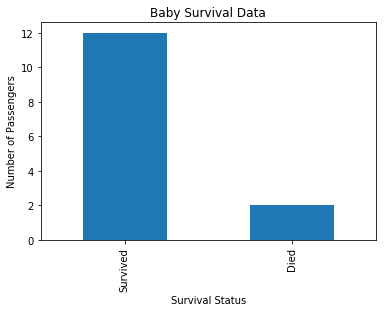

In [43]:
baby_survival_data.plot(kind='bar')
plt.title('Baby Survival Data')
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')

In [44]:
print(baby_survival_data)

Survived    12
Died         2
Name: Survived, dtype: int64


In [45]:
print(baby_survival_data['Survived']/(baby_survival_data['Survived']+baby_survival_data['Died'])*100)

85.7142857143


The data presented above shows that there were 14 baby passengers and out of them 12 survived (approximately 85.71%) and 2 died. Next I will explore the pre-teen dataset. 

In [46]:
pre_teen_survival_data = pre_teen_data['Survived'].value_counts()

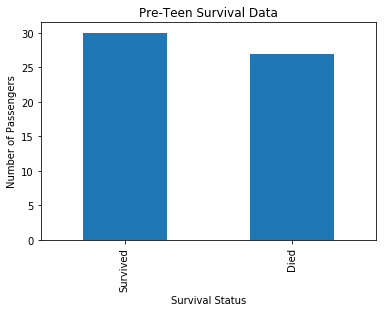

In [47]:
pre_teen_survival_data.plot.bar()
plt.title('Pre-Teen Survival Data')
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')

In [48]:
print(pre_teen_survival_data)

Survived    30
Died        27
Name: Survived, dtype: int64


In [49]:
print(pre_teen_survival_data['Survived']/(pre_teen_survival_data['Survived']+pre_teen_survival_data['Died'])*100)

52.6315789474


For the pre-teen passengers, 30 of the 57 survived. This account for approximately 52.63% of pre-teen passengers.

In [50]:
teen_survival_data = teen_data['Survived'].value_counts()

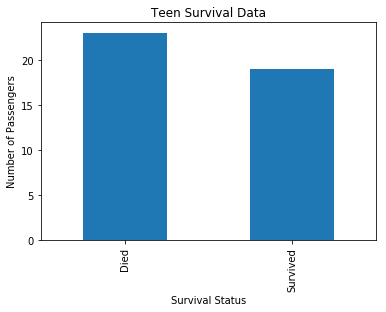

In [51]:
teen_survival_data.plot(kind='bar')
plt.title('Teen Survival Data')
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')

In [52]:
print(teen_survival_data)

Died        23
Survived    19
Name: Survived, dtype: int64


In [53]:
print(teen_survival_data['Survived']/(teen_survival_data['Survived']+teen_survival_data['Died'])*100)

45.2380952381


The data above shows that approximately 45.24% of teen passengers survived. That's 23 of the 42.

In [54]:
adult_survival_data = adult_data['Survived'].value_counts()

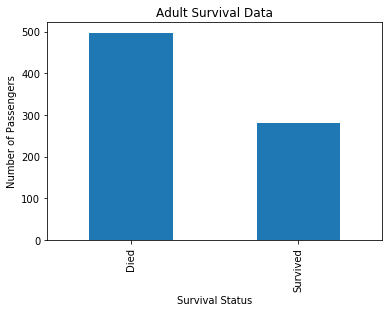

In [55]:
adult_survival_data.plot(kind='bar')
plt.title('Adult Survival Data')
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')

In [56]:
print(adult_survival_data)

Died        497
Survived    281
Name: Survived, dtype: int64


In [57]:
print(adult_survival_data['Survived']/(adult_survival_data['Survived']+adult_survival_data['Died'])*100)

36.118251928


In [58]:
print(percentage_difference(adult_survival_data['Survived']+adult_survival_data['Died'],baby_survival_data['Survived']+baby_survival_data['Died'])) # Percentage difference of survivors

192.929292929


36% of the adult passengers survived, the graph and data above shows that 497 adult passengers died and 281 survived. It can be noted that babies had the best chance of survival. 85% of the babies on board survived compared to the adults were there were about 193% more of. It appears that the older you are the less chance you had to survive. The oldest being the adults of course had approximately 36% chance to survive.

# Which social class had a better chance of survival?

For this last question I will need information from the *Pclass* column of this dataset. To do this I'll split the data up by class, from there I will be able to perform some analysis.

In [59]:
first_class_data = titanic_data[(titanic_data['Pclass'] == 1)]

In [60]:
first_class_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,Died,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,Survived,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,Survived,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [61]:
first_class_survival_data = first_class_data['Survived'].value_counts()

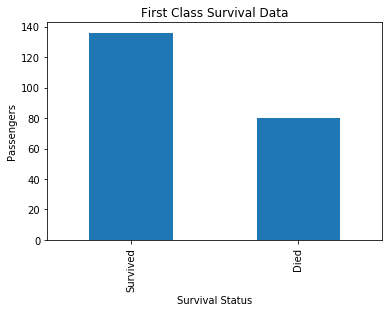

In [62]:
first_class_survival_data.plot(kind='bar')
plt.title('First Class Survival Data')
plt.xlabel('Survival Status')
plt.ylabel('Passengers')

In [63]:
print(first_class_survival_data)

Survived    136
Died         80
Name: Survived, dtype: int64


In [64]:
print(first_class_survival_data['Survived']/(first_class_survival_data['Survived']+first_class_survival_data['Died'])*100)

62.962962963


I started with the first class passengers. It can be noted that the 136 of the 216 survived, which is approximately 62.96%.

In [65]:
second_class_data = titanic_data[(titanic_data['Pclass'] == 2)]
second_class_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,Survived,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,None,C
15,16,Survived,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.000000,0,0,248706,16.0000,None,S
17,18,Survived,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,None,S
20,21,Died,2,"Fynney, Mr. Joseph J",male,35.000000,0,0,239865,26.0000,None,S
21,22,Survived,2,"Beesley, Mr. Lawrence",male,34.000000,0,0,248698,13.0000,D56,S


In [66]:
second_class_survival_data = second_class_data['Survived'].value_counts()

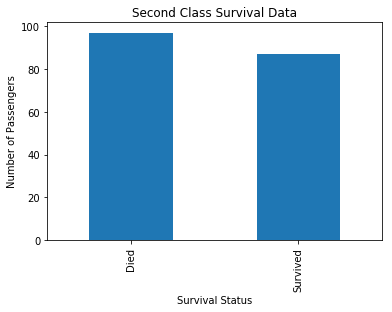

In [67]:
second_class_survival_data.plot(kind='bar')
plt.title('Second Class Survival Data')
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')

In [68]:
print(second_class_survival_data)

Died        97
Survived    87
Name: Survived, dtype: int64


In [69]:
print(second_class_survival_data['Survived']/(second_class_survival_data['Survived']+second_class_survival_data['Died'])*100)

47.2826086957


There are 184 second class passengers and out of them 97 survived. This accounts for 47.28%. This shows that there were more first class passengers and they also had more survivors than the second class passengers.

In [70]:
third_class_data = titanic_data[(titanic_data['Pclass'] == 3)]
third_class_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Died,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,None,S
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,None,S
4,5,Died,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,None,S
5,6,Died,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,None,Q
7,8,Died,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,None,S


In [71]:
third_class_survival_data = third_class_data['Survived'].value_counts()

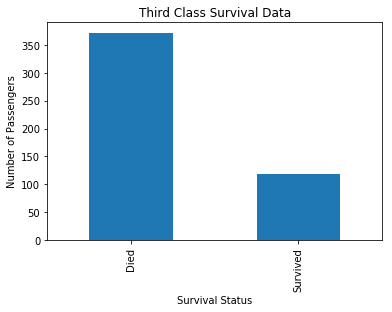

In [72]:
third_class_survival_data.plot(kind='bar')
plt.title('Third Class Survival Data')
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')

In [73]:
print(third_class_survival_data)

Died        372
Survived    119
Name: Survived, dtype: int64


In [74]:
print(third_class_survival_data['Survived']/(third_class_survival_data['Survived']+third_class_survival_data['Died'])*100)

24.2362525458


The data on the third class passengers shows that they had the most passengers at 491 and the lowest percentage of survivors at approximately 24.24%. 

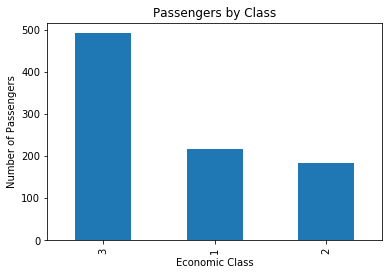

In [75]:
titanic_data['Pclass'].value_counts().plot(kind='bar')
plt.title('Passengers by Class')
plt.xlabel('Economic Class')
plt.ylabel('Number of Passengers')

As you can see from the code above, although third class passengers were the majority of passengers on board, approximately 24% of them died. First class has the highest survival, while second class is the group with least amount of passengers, about 63% of first class passengers survived. The higher status you were, the better chance you had to survive. 

#  Conclusion 

<p>To conclude, in regards to which to gender had the greatest chance of survival, male passengers were the majority having 59% more passengers than female, yet approximately 72.5% more female passengers survived than males. From this one could infer that female passengers had a greater chance of survival than male passengers. This could be because in emergency situations for survival, women and children are the first priority. This could also be said for the question which age group had the greatest chance to survive. The baby age group had approximately 85.71% survivors. It was also seen that the older the age group, the lower the percentage of survivors within that group. As for the last question, "Which class had the greatest chance of survival?". The higher your economic class, the greater chance you had of surviving. Tragically, third class passengers were the majority at 491 passengers, however they had a lower chance to survive than the second and first class passengers.</p>
<p>    It is very important to note that just because the data and statistics shown here correlate to one point does not make it a direct factor, or a certain truth. The reason being this is only a sample of all the Titanic passengers. According to the [Encyclopedia Titanica](http://www.encyclopedia-titanica.org/manifest.php?q=1), there were 2,249 people on board the Titanic. The dataset I was performing analysis with contained 891 passengers. Another thing is I could not perform statistical testing as I'd like to with the data presented. The reason being the ages value that I filled in with the mean of the age created an outlier for the age column. The downsides to this is that the sample data that I have worked with may not be representative of the population as a whole. </p>